Importing Necessary Libraries.

In [32]:
#data analysis libraries 
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_context('notebook')
%config InlineBackend.figure_format = 'retina'

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [33]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

Now Read and Explore the data by using panda library function- read_csv() and explore()

In [34]:
test = pd.read_csv("../input/titanic/test.csv")
train = pd.read_csv("../input/titanic/train.csv")
# preview the data
train.head()
# check the number of missing values and other information in the feature
#train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
# check the number of missing values and other information in the feature
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Serepeca, Miss. Augusta",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [36]:
# Check the Information of Train and Test Data
train.info()
print("----------------------------")
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

**Selecting Features and Data Engineering for Missing values in feature  :** Among the features 19.8% data is missing in age feature. 77.1% data are missing in cabin feature and 0.22% data is missing in embarked  feature. We will drop cabin feature considering it will be hard/incorrect to fill up this amount of missing data. In embarked feature we will fill the missing value by most appeared value in this feature. Also we will drop feature passenger id, Name and ticket considering as irreleveant feauture. 

In [37]:
# dropping unnecessary columns
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)



In [38]:
# dropping unnecessary columns
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)
train = train.drop(['PassengerId'], axis = 1)
test = test.drop(['PassengerId'], axis = 1)

Now we will fill up the Embarked feature with the most occured value which is "S" and We will fill up the missing age value by generating random number within standard deviation from mean value in the age feature. 

In [39]:
train["Embarked"] = train["Embarked"].fillna("S")

In [40]:
# get average, std, and number of NaN values in titanic_df
average_age_train   = train["Age"].mean()
std_age_train       = train["Age"].std()
count_nan_train = train["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test["Age"].mean()
std_age_test       = test["Age"].std()
count_nan_test = test["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_train - std_age_train, average_age_train + std_age_train, size = count_nan_train)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_test)

print(average_age_train)
#train["Age"]=train["Age"].dropna()
# fill NaN values in Age column with random values generated
train["Age"][np.isnan(train["Age"])] = rand_1
test["Age"][np.isnan(test["Age"])] = rand_2

# convert from float to int
train['Age'] = train['Age'].astype(int)
test['Age']    = test['Age'].astype(int)


29.69911764705882


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [41]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.

train['Family'] =  train["Parch"] + train["SibSp"]
train['Family'].loc[train['Family'] > 0] = 1
train['Family'].loc[train['Family'] == 0] = 0

test['Family'] =  test["Parch"] + test["SibSp"]
test['Family'].loc[test['Family'] > 0] = 1
test['Family'].loc[test['Family'] == 0] = 0

#titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
#test_df    = test_df.drop(['SibSp','Parch'], axis=1)


/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


**Data Visualization:**
Analysis of features by using data Visualization

Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


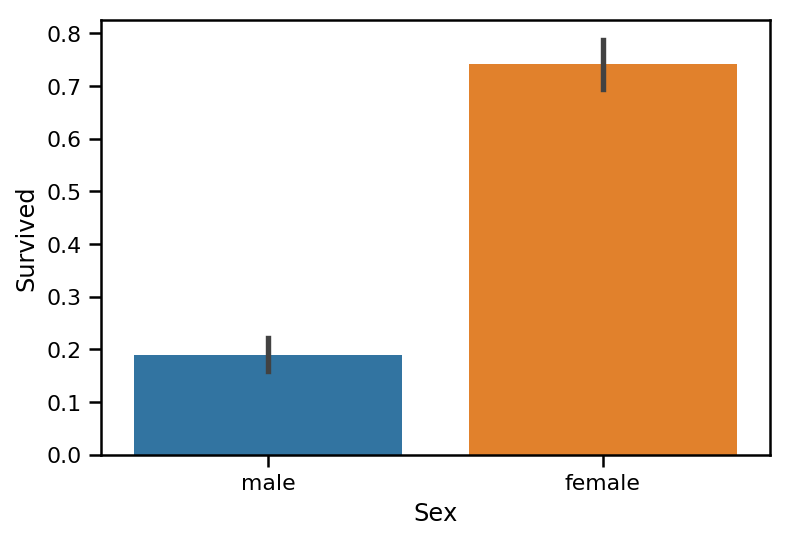

In [42]:
#draw a bar plot of survival by sex
sns.barplot(x="Sex", y="Survived", data=train)

#print percentages of females vs. males that survive
print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

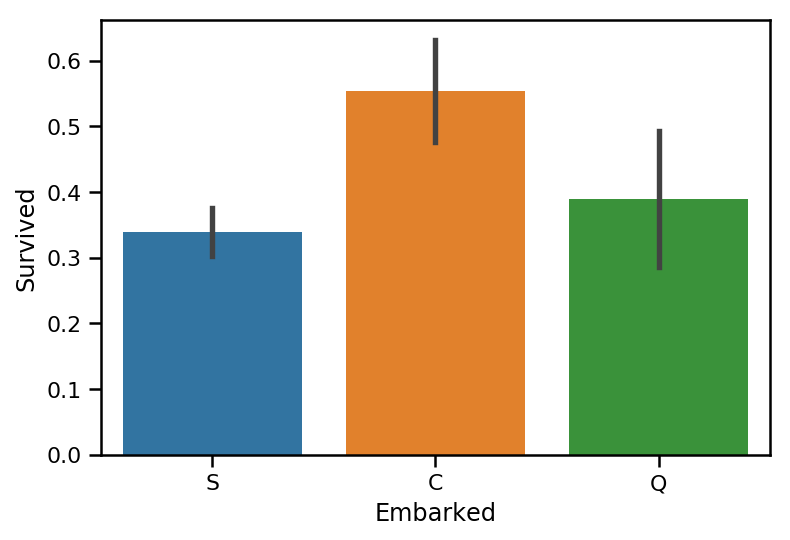

In [43]:
#draw a bar plot of survival by Embarked station
sns.barplot(x="Embarked", y="Survived", data=train)

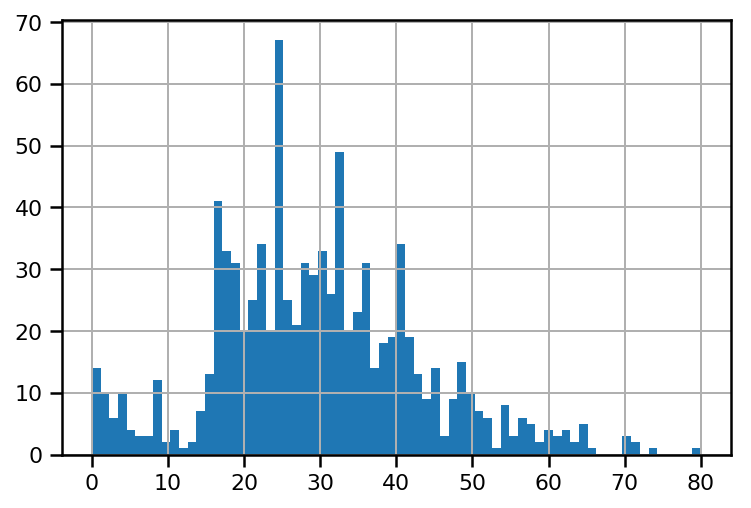

In [44]:
# Draw a histogram plot of 
train['Age'].hist(bins=70)

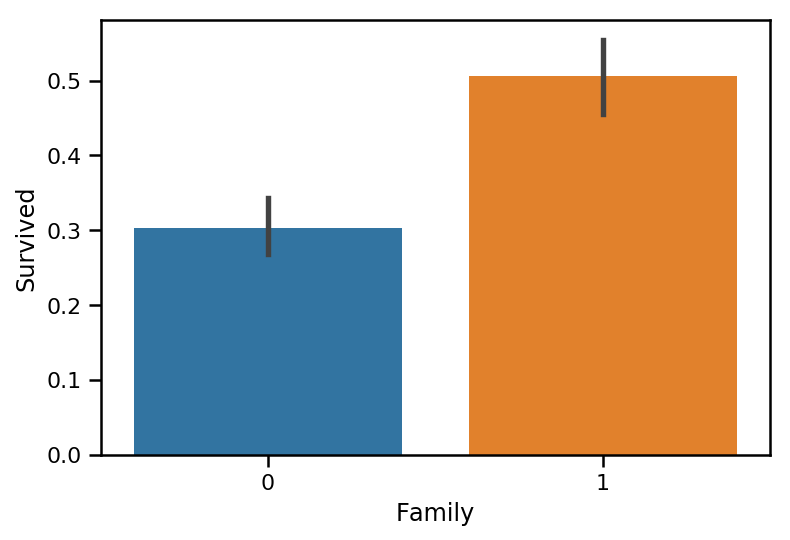

In [45]:
#draw a bar plot of survival by Family
sns.barplot(x="Family", y="Survived", data=train)

**Managing the Categorical data**

In [46]:
labelencoder_train_sex= LabelEncoder()
train['Sex']= labelencoder_train_sex.fit_transform(train['Sex'])
labelencoder_test_sex= LabelEncoder()
test['Sex']= labelencoder_test_sex.fit_transform(test['Sex'])

labelencoder_train_embarked= LabelEncoder()
train['Embarked']= labelencoder_train_embarked.fit_transform(train['Embarked'])
labelencoder_test_embarked= LabelEncoder()
test['Embarked']= labelencoder_test_embarked.fit_transform(test['Embarked'])




In [23]:
average_Fare_test   = test["Fare"].mean()
test["Fare"][np.isnan(test["Fare"])] = average_Fare_test

# convert Fare from float to int
train['Fare'] = train['Fare'].astype(int)
test['Fare']    = test['Fare'].astype(int)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Check the Information of Train and Test Data
train.info()
print("----------------------------")
test.info()

**Classifier Comparison**

In [24]:
# define training and testing sets

X_train = train.drop("Survived",axis=1)
Y_train = train["Survived"]
X_test  = test

In [25]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

0.8035914702581369

In [26]:
# Support Vector Machines

 svc = SVC()

 svc.fit(X_train, Y_train)

 Y_pred = svc.predict(X_test)

 svc.score(X_train, Y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8978675645342312

In [27]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.9696969696969697

In [28]:
 knn = KNeighborsClassifier(n_neighbors = 3)

 knn.fit(X_train, Y_train)

 Y_pred = knn.predict(X_test)

 knn.score(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

0.8249158249158249

In [29]:
# Gaussian Naive Bayes

 gaussian = GaussianNB()

 gaussian.fit(X_train, Y_train)

 Y_pred = gaussian.predict(X_test)

 gaussian.score(X_train, Y_train)

0.7890011223344556

               **Classifier** 	  **Accuracy**
        Logistic Regression	       80.24%
               SVM	               90.12%
          Random Forest	           96.96%
       K Nearest Neighbour	       84.06%
       Gaussian Naïve bayes	       79.01%


In [30]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.9696969696969697

In [31]:
submission = pd.DataFrame({
        
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)